# GDELT data

Global Database of Events, Language, and Tone

## GDELT Facts

    GDELT 1.0 is a daily dataset
        1.0 only has 'events' and 'gkg' tables
        1.0 posts the previous day's data at 6AM EST of next day (i.e. Monday's data will be available 6AM Tuesday EST)
    GDELT 2.0 is updated every 15 minutes
        Some time intervals can have missing data; gdeltPyR provides a warning for missing data
        2.0 has 'events','gkg', and 'mentions' tables
        2.0 has a distinction between native english and translated-to-english news
        2.0 has more columns

Version 2 has more fields of data so consumes more memory. Version 1 has less fields.

## Output Options

gdeltPyR can output results directly into several formats which include:

    pandas dataframe
    csv
    json
    geopandas dataframe (as of version 0.1.10)
    GeoJSON (coming soon version 0.1.11)
    Shapefile (coming soon version 0.1.11)

## gdeltPyR Parameters

| Name         | Description                                                                                                                                                                                                                     | Input Possibilities/Examples                                       |
|--------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------|
| version      | (integer) - Selects the version of GDELT data to query; defaults to version 2.                                                                                                           | 1 or 2                                                           |
| date         | (string or list of strings) - Dates to query                                                                                                                                            | "2016 10 23" or "2016 Oct 23"                                     |
| coverage     | (bool) - For GDELT 2.0, pulls every 15-minute interval in the dates passed in the 'date' parameter. Default coverage is False or None. gdeltPyR will pull the latest 15-minute interval for the current day or the last 15-minute interval for a historic day. | True or False or None                                             |
| translation  | (bool) - For GDELT 2.0, if the English or translated-to-English dataset should be downloaded                                                                                            | True or False                                                    |
| tables       | (string) - The specific GDELT table to pull. The default table is the 'events' table. See the GDELT documentation page for more information                                            | 'events' or 'mentions' or 'gkg'                                  |
| output       | (string) - The output type for the results                                                                                                                                              | 'json' or 'csv' or 'gpd'                                         |




## Package: gdelt
https://pypi.org/project/gdelt/

In [ ]:
#!pip install gdelt
#!pip install --upgrade geopandas
#!pip install missingno
#!pip install mercury

### failed attempt

In [7]:
import gdelt

here


In [ ]:
gd = gdelt.gdelt()
events = gd.Search(['2017 May 23'],table='events',output='gpd',normcols=True,coverage=False)

In [ ]:
# new schema method
print(gd.schema('events'))

### Version 1 queries

In [36]:
import gdelt
import missingno as msno

In [26]:
gd1 = gdelt.gdelt(version=1)

(187291, 11)


DATE NUMARTS                                             COUNTS  \
1  20161101       1                  WOUND#3##1#China#CH#CH#35#105#CH;   
2  20161101       1  KILL#3##4#Perth, Western Australia, Australia#...   
3  20161101       3                                                NaN   
4  20161101       1                                                NaN   
5  20161101       1                                                NaN   

                                              THEMES  \
1  ECON_STOCKMARKET;WOUND;MEDICAL;TAX_FNCACT;TAX_...   
2  TAX_WORLDLANGUAGES;TAX_WORLDLANGUAGES_TEMBA;TA...   
3  TAX_FNCACT;TAX_FNCACT_CHAIRWOMAN;USPEC_POLITIC...   
4  WB_678_DIGITAL_GOVERNMENT;WB_2944_SERVERS;WB_6...   
5  TAX_ETHNICITY;TAX_ETHNICITY_GERMAN;TAX_WORLDLA...   

                                           LOCATIONS  \
1                            1#China#CH#CH#35#105#CH   
2  4#Far East, Mpumalanga, South Africa#SF#SF07#-...   
3  4#Beijing, Beijing, China#CH#CH22#39.9289#116....   
4  2#Wisconsin, United States#US#USWI#44.2563#-89...   
5                            1#Germany#GM#GM#51#9#GM   

                                             PERSONS  \
1  edward mead johnson;robert wood johnson;james ...   
2            orhan abbas;oye guilavogui;temba bavuma   
3                             sun yat-sen;alex huang   
4  russ feingold;donald trump;maggie hassan;mered...   
5                 wojciech stempniewicz;armin meiwes   

                                       ORGANIZATIONS  \
1  options low p s companies insider trends;guruf...   
2  emirates airline;emirates;conakry internationa...   
3   central news agency;democratic progressive party   
4  senate leadership fund;national republican sen...   
5                                                NaN   

                                                TONE  \
1  2.4745269286754,4.29403202328966,1.81950509461...   
2  0.493421052631579,2.30263157894737,1.809210526...   
3  1.16822429906542,5.14018691588785,3.9719626168...   
4  -1.4647137150466,2.39680426098535,3.8615179760...   
5  -9.57446808510638,1.06382978723404,10.63829787...   

                                       CAMEOEVENTIDS  \
1                                                NaN   
2  594592776,594593281,594593282,594593283,594593284   
3  594630110,594630124,594630128,594601010,594630...   
4                      594740826,594740874,594698978   
5                                                NaN   

                                  SOURCES  \
1                           gurufocus.com   
2                    sierraleonetimes.com   
3  wgmd.com;dailyjournal.net;tribtown.com   
4                            stltoday.com   
5                           ibtimes.co.uk   

                                          SOURCEURLS  
1  http://www.gurufocus.com/news/456785/dividend-...  
2  http://www.sierraleonetimes.com/index.php/sid/...  
3  http://www.wgmd.com/taiwan-opposition-party-le...  
4  http://www.stltoday.com/news/national/govt-and...  
5  http://www.ibtimes.co.uk/german-ex-policeman-a...

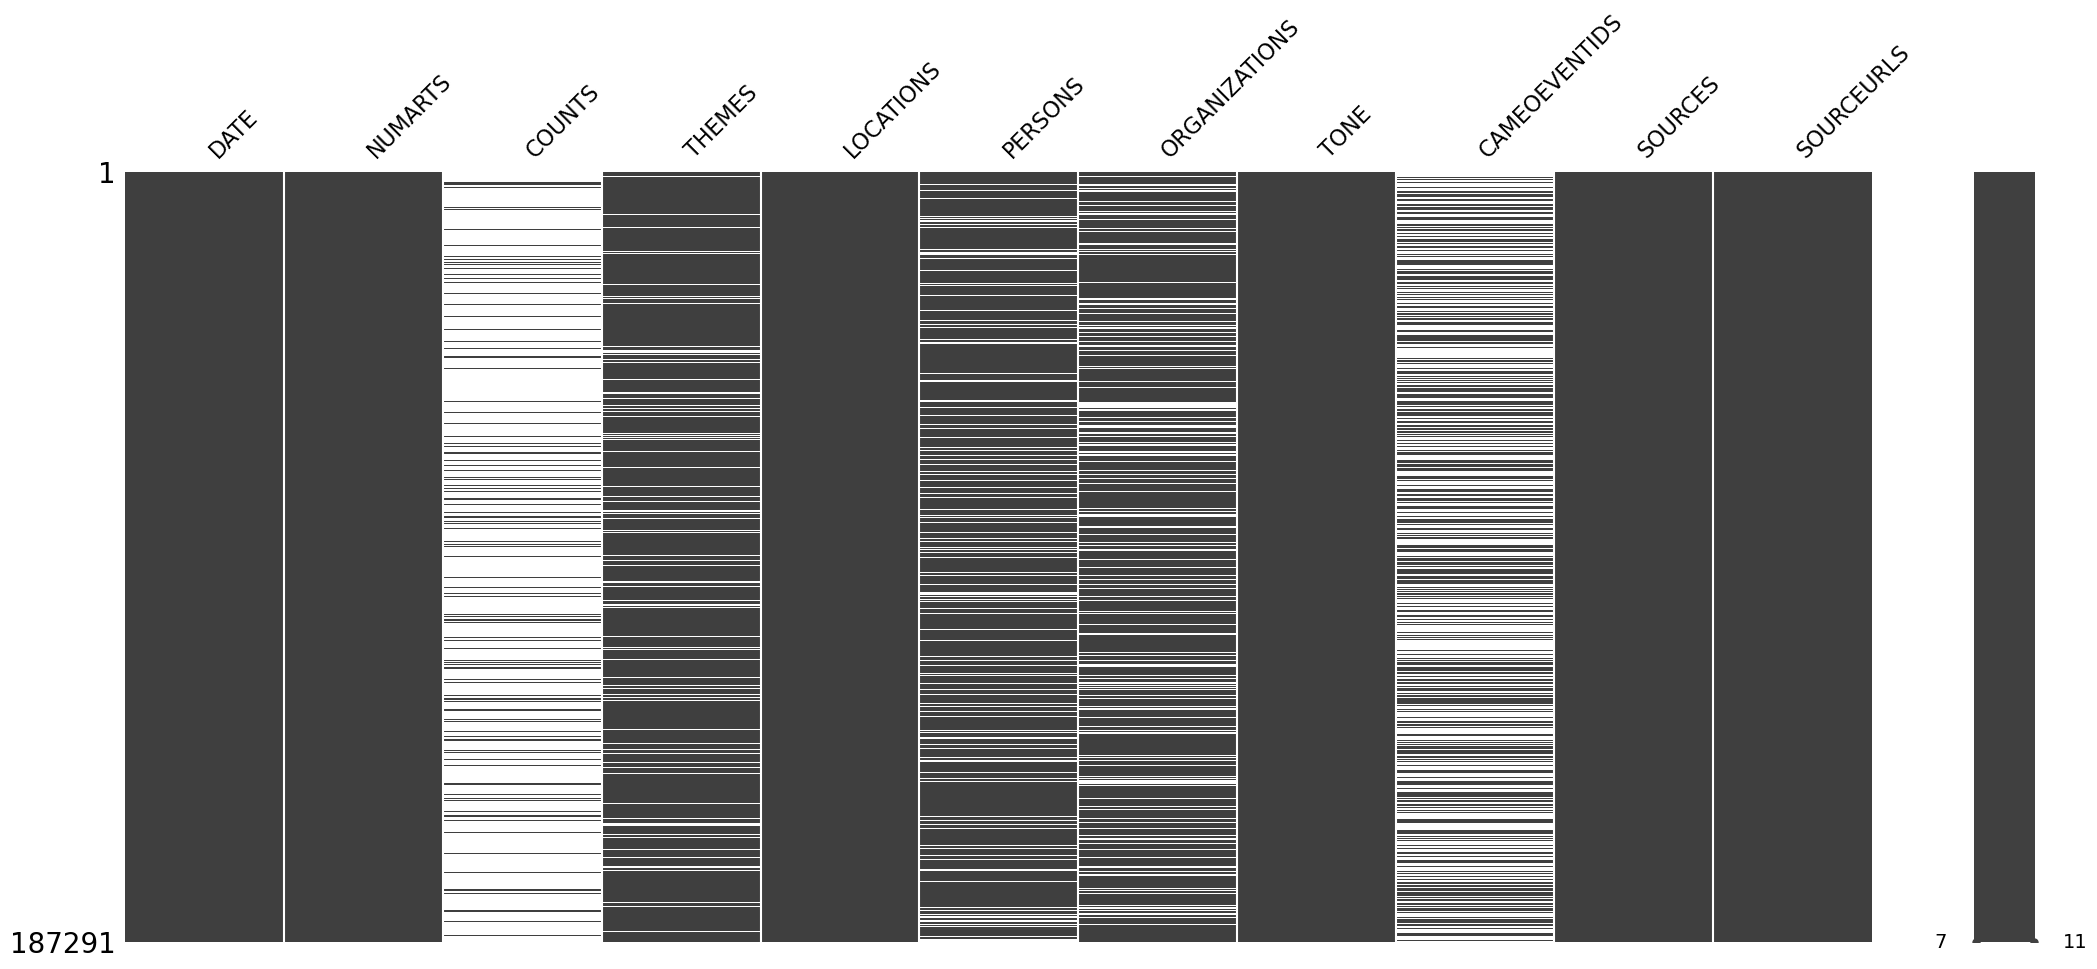

In [58]:
# pull single day, gkg table
results= gd1.Search('2016 Nov 01',table='gkg')
#results= gd1.Search('2022 Feb 24',table='gkg')
print(results.shape)
msno.matrix(results)
results.head()

(673690, 59)


GLOBALEVENTID   SQLDATE  MonthYear  Year  FractionDate Actor1Code  \
0      594210127  20151101     201511  2015     2015.8247        BUS   
1      594210128  20151101     201511  2015     2015.8247        CAN   
2      594210129  20151101     201511  2015     2015.8247        CAN   
3      594210130  20151101     201511  2015     2015.8247        CAN   
4      594210131  20151101     201511  2015     2015.8247        EDU   

  Actor1Name Actor1CountryCode Actor1KnownGroupCode Actor1EthnicCode  ...  \
0       BANK               NaN                  NaN              NaN  ...   
1     CANADA               CAN                  NaN              NaN  ...   
2     CANADA               CAN                  NaN              NaN  ...   
3     CANADA               CAN                  NaN              NaN  ...   
4    STUDENT               NaN                  NaN              NaN  ...   

  Actor2Geo_FeatureID ActionGeo_Type                     ActionGeo_FullName  \
0                  SN              1                              Singapore   
1                  CA              1                                 Canada   
2                  NO              1                                 Canada   
3                  NO              1                                 Norway   
4                 NaN              4  Cape Town, Western Cape, South Africa   

  ActionGeo_CountryCode ActionGeo_ADM1Code ActionGeo_Lat ActionGeo_Long  \
0                    SN                 SN        1.3667       103.8000   
1                    CA                 CA       60.0000       -95.0000   
2                    CA                 CA       60.0000       -95.0000   
3                    NO                 NO       62.0000        10.0000   
4                    SF               SF11      -33.9167        18.4167   

  ActionGeo_FeatureID DATEADDED  \
0                  SN  20161031   
1                  CA  20161031   
2                  CA  20161031   
3                  NO  20161031   
4            -1217214  20161031   

                                           SOURCEURL  
0  http://finance.yahoo.com/news/singapore-inc-fa...  
1  http://m.philstar.com/opinion/show/5ac3b58e96f...  
2  http://m.philstar.com/opinion/show/5ac3b58e96f...  
3  http://m.philstar.com/opinion/show/5ac3b58e96f...  
4  http://www.iol.co.za/capetimes/students-mustnt...  

[5 rows x 59 columns]

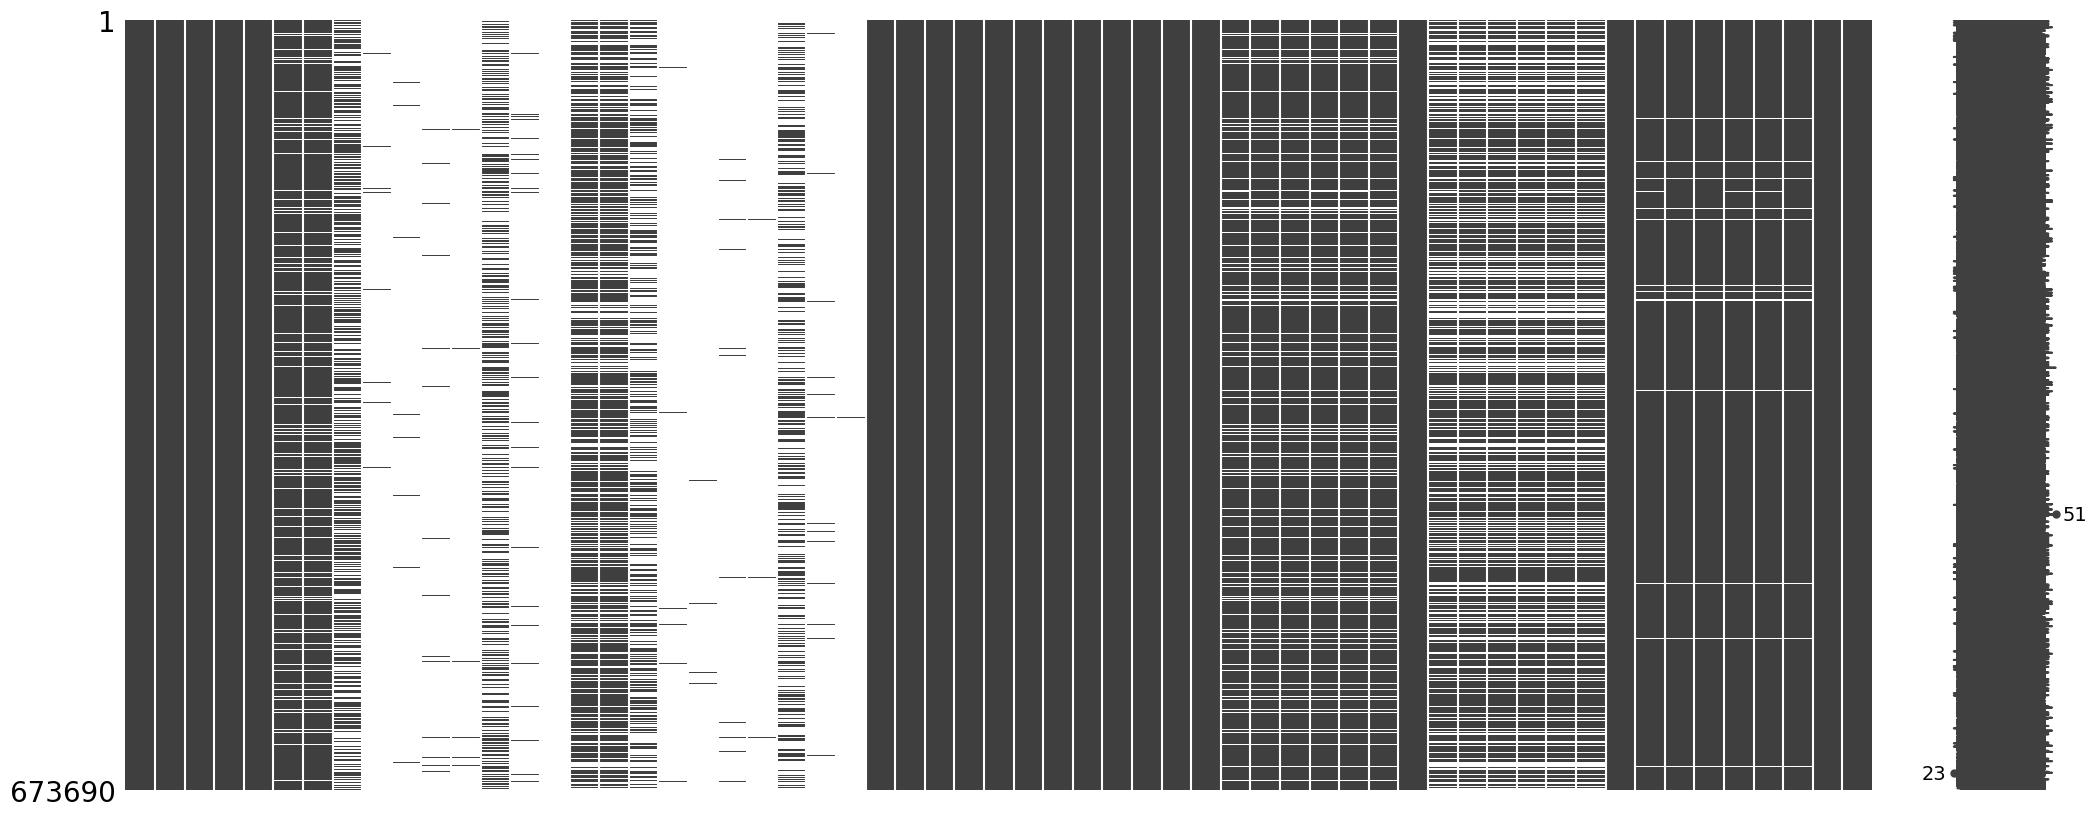

In [60]:
# pull events table, range, output to json format
results = gd1.Search(['2016 Oct 31','2016 Nov 2'],coverage=True,table='events')
print(results.shape)
msno.matrix(results)
results.head()

### Version 2 queries

In [173]:
gd2 = gdelt.gdelt(version=2)

In [175]:
# Single 15 minute interval pull, output to json format with mentions table
results = gd2.Search('2016 Nov 1',table='mentions',output='json')

In [74]:
import mercury as mr
mr.JSON(results)

(226375, 62)


GLOBALEVENTID   SQLDATE  MonthYear  Year  FractionDate Actor1Code  \
0      594581878  20151102     201511  2015     2015.8274        AUS   
1      594581879  20151102     201511  2015     2015.8274     AUSBUS   
2      594581880  20151102     201511  2015     2015.8274        CAN   
3      594581881  20151102     201511  2015     2015.8274        CVL   
4      594581882  20151102     201511  2015     2015.8274        CVL   

   Actor1Name Actor1CountryCode Actor1KnownGroupCode Actor1EthnicCode  ...  \
0  QUEENSLAND               AUS                  NaN              NaN  ...   
1   AUSTRALIA               AUS                  NaN              NaN  ...   
2      CANADA               CAN                  NaN              NaN  ...   
3   COMMUNITY               NaN                  NaN              NaN  ...   
4   COMMUNITY               NaN                  NaN              NaN  ...   

  ActionGeo_Type                             ActionGeo_FullName  \
0              4  The Great Barrier Reef, Queensland, Australia   
1              1                                      Australia   
2              1                                 United Kingdom   
3              4     Timaru, New Zealand (general), New Zealand   
4              4     Timaru, New Zealand (general), New Zealand   

  ActionGeo_CountryCode ActionGeo_ADM1Code ActionGeo_ADM2Code ActionGeo_Lat  \
0                    AS               AS04              40197         -18.0   
1                    AS                 AS                NaN         -27.0   
2                    UK                 UK                NaN          54.0   
3                    NZ               NZ00              22392         -44.4   
4                    NZ               NZ00              22392         -44.4   

  ActionGeo_Long ActionGeo_FeatureID       DATEADDED  \
0        146.833            -1576458  20161101023000   
1        133.000                  AS  20161101023000   
2         -2.000                  UK  20161101023000   
3        171.250            -1519719  20161101023000   
4        171.250            -1519719  20161101023000   

                                           SOURCEURL  
0  https://www.theguardian.com/sustainable-busine...  
1  http://www.canberratimes.com.au/money/borrowin...  
2  http://www.benningtonbanner.com/stories/low-li...  
3  http://m.nzherald.co.nz/nz/news/article.cfm?c_...  
4  http://m.nzherald.co.nz/nz/news/article.cfm?c_...  

[5 rows x 62 columns]

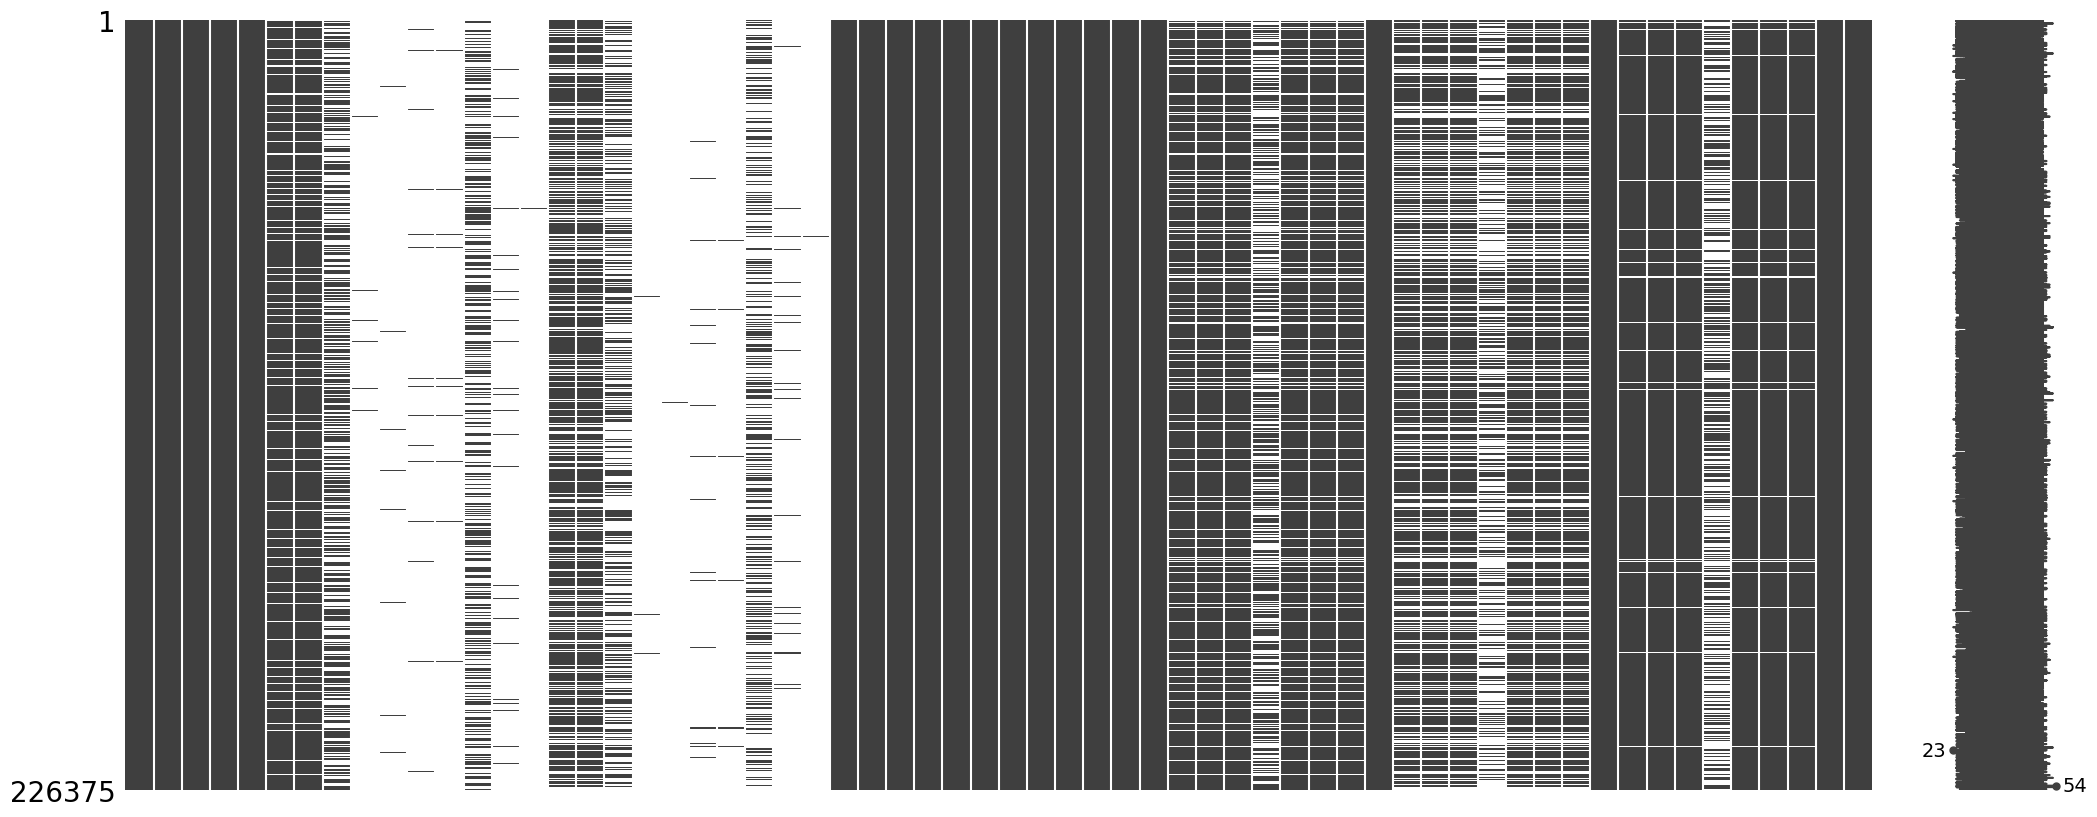

In [177]:
# Full day pull, output to pandas dataframe, events table
results = gd2.Search(['2016 11 01'],table='events',coverage=True)
print(results.shape)
msno.matrix(results)
results.head()

In [179]:
for col in results.columns:
    print(col)

GLOBALEVENTID
SQLDATE
MonthYear
Year
FractionDate
Actor1Code
Actor1Name
Actor1CountryCode
Actor1KnownGroupCode
Actor1EthnicCode
Actor1Religion1Code
Actor1Religion2Code
Actor1Type1Code
Actor1Type2Code
Actor1Type3Code
Actor2Code
Actor2Name
Actor2CountryCode
Actor2KnownGroupCode
Actor2EthnicCode
Actor2Religion1Code
Actor2Religion2Code
Actor2Type1Code
Actor2Type2Code
Actor2Type3Code
IsRootEvent
EventCode
CAMEOCodeDescription
EventBaseCode
EventRootCode
QuadClass
GoldsteinScale
NumMentions
NumSources
NumArticles
AvgTone
Actor1Geo_Type
Actor1Geo_FullName
Actor1Geo_CountryCode
Actor1Geo_ADM1Code
Actor1Geo_ADM2Code
Actor1Geo_Lat
Actor1Geo_Long
Actor1Geo_FeatureID
Actor2Geo_Type
Actor2Geo_FullName
Actor2Geo_CountryCode
Actor2Geo_ADM1Code
Actor2Geo_ADM2Code
Actor2Geo_Lat
Actor2Geo_Long
Actor2Geo_FeatureID
ActionGeo_Type
ActionGeo_FullName
ActionGeo_CountryCode
ActionGeo_ADM1Code
ActionGeo_ADM2Code
ActionGeo_Lat
ActionGeo_Long
ActionGeo_FeatureID
DATEADDED
SOURCEURL


### Example: Retrieving GDELT DataPermalink
https://jfking50.github.io/gdelt/



In [ ]:
#!pip install pygeodesy
#!pip install marisa_trie 

In [189]:
import pandas as pd               # gdelt data will be pulled into a Pandas dataframe
import numpy as np                # used for array and vector operations
import gdelt                      # for gdelt searches
import pygeodesy as pgd           # for geohash operations
import marisa_trie as mt          # for creating a trie data structure
import warnings                   # gdelt searches generates a bunch of warnings, so suppress them
warnings.filterwarnings('ignore')

In [198]:
gd = gdelt.gdelt()     # instantiate the gdeltPyR object for searches
october = gd.Search(date=['2017 Oct 1','2017 Oct 30'], normcols=True) # normalize column names to SQL friendly format
print("The number of reports is", len(october))     # number of events returned

The number of reports is 47573


In [192]:
def haversine_funct(lat1, lon1, lat2, lon2):
    # Calculates the great circle distance between two locations given in decimal degrees latitude and logitude
    kms = 3959*1.60934
    lat1, lon1, lat2, lon2 = map(np.deg2rad, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    total_km = kms * c
    return total_km

haver_vec = np.vectorize(haversine_funct)                      # vectorize the haversine function for speed


In [194]:
def haver_subset(df, x, y, z):
    '''Filters a dataframe based on a location, search radius, and event codes
    Inputs:
        df: a dataframe containing GDELT search results
        x: a latitude, longitude tuple
        y: a distance in kilometers
        z: a list of event codes
    Returns a filtered dataframe'''
    df['eventrootcode'] = pd.to_numeric(df['eventrootcode'])   # convert codes from 040 to 40
    df = df[df['eventrootcode'].isin(z)]                       # filter by event code
    df['Dist'] = haver_vec(location[0], location[1], df['actiongeolat'].values, df['actiongeolong'].values) # calc distance
    df = df[df['Dist'] < y]                                    # filter by distance
    return df


In [200]:
location = (15.05, 1.82)                                       # user specified latitude, longitude
dist = 300                                                     # user specified search distance in km
ecodes = [13, 14, 18, 19, 20]                                  # user specified event codes

haver_df = haver_subset(october, location, dist, ecodes)       # call the filtering function
haver_df = haver_df.sort_values('Dist', ascending=True)        # sort by distance

# display select columns for the 10 closest events
haver_df[['globaleventid', 'eventrootcode', 'actiongeolat', 'actiongeolong', 'Dist']].head(10)

globaleventid  eventrootcode  actiongeolat  actiongeolong        Dist
26332      695524173             18       15.0522        1.83180    1.290563
26334      695524175             18       15.0522        1.83180    1.290563
26024      695523865             19       14.2117        1.45306  101.236042
31347      699403935             18       14.2117        1.45306  101.236042
25991      695523832             19       13.6951        1.74200  150.901012
25993      695523834             19       13.6951        1.74200  150.901012
14165      697422773             19       13.5167        2.11667  173.476446
25955      695523796             19       13.5167        2.11667  173.476446
36034      699726429             18       13.5167        2.11667  173.476446
40220      700437358             19       13.5167        2.11667  173.476446

In [202]:
print("The number of reports is", len(haver_df))     # number of events returned

The number of reports is 14


## Package: gdeltdoc

https://github.com/alex9smith/gdelt-doc-api

In [ ]:
#!pip install gdeltdoc

In [111]:
from gdeltdoc import GdeltDoc, Filters
import pandas as pd

In [88]:
f = Filters(
    keyword = "climate change",
    start_date = "2020-05-10",
    end_date = "2020-05-11"
)

gd = GdeltDoc()

### Article List

The article list mode of the API generates a list of news articles that match the filters. The client returns this as a pandas DataFrame with columns 
- url, 
- url_mobile, 
- title,
- seendate, 
- socialimage,
- domain,
- language,
- sourcecountry.

In [ ]:
# Search for articles matching the filters
articles = gd.article_search(f)

(250, 8)


url  \
0  https://www.sueddeutsche.de/wissen/corona-klim...   
1  https://saudigazette.com.sa/article/592941/Wor...   
2  https://laverdadnoticias.com/ecologia/Covid-19...   
3  http://www.busan.com/view/busan/view.php?code=...   
4  https://www.albayan.ae/across-the-uae/news-and...   

                                          url_mobile  \
0  https://www.sueddeutsche.de/wissen/corona-klim...   
1                                                      
2  https://laverdadnoticias.com/amp/ecologia/Covi...   
3                                                      
4  https://www.albayan.ae/across-the-uae/news-and...   

                                               title          seendate  \
0  Trotzt Corona : Mehrheit für kon­se­quenten Kl...  20200510T190000Z   
1  Virus should be a wake - up call to every gove...  20200510T201500Z   
2  Covid - 19 : La disminución de contaminación e...  20200510T210000Z   
3                   생태계 교란종  등검은말벌  급속 확산 … 꿀벌 다 죽인다  20200510T170000Z   
4            كورونا نقطة تحول فاصلة في تاريخ البشرية  20200510T161500Z   

                                         socialimage                domain  \
0  https://www.sueddeutsche.de/image/sz.1.4902342...       sueddeutsche.de   
1  https://saudigazette.com.sa/uploads/images/202...   saudigazette.com.sa   
2  https://laverdadnoticias.com/__export/15891399...  laverdadnoticias.com   
3  http://www.busan.com/nas/wcms/wcms_data/photos...             busan.com   
4  https://www.albayan.ae/polopoly_fs/1.3855034.1...            albayan.ae   

  language         sourcecountry  
0   German               Germany  
1  English          Saudi Arabia  
2  Spanish                Mexico  
3   Korean           South Korea  
4   Arabic  United Arab Emirates

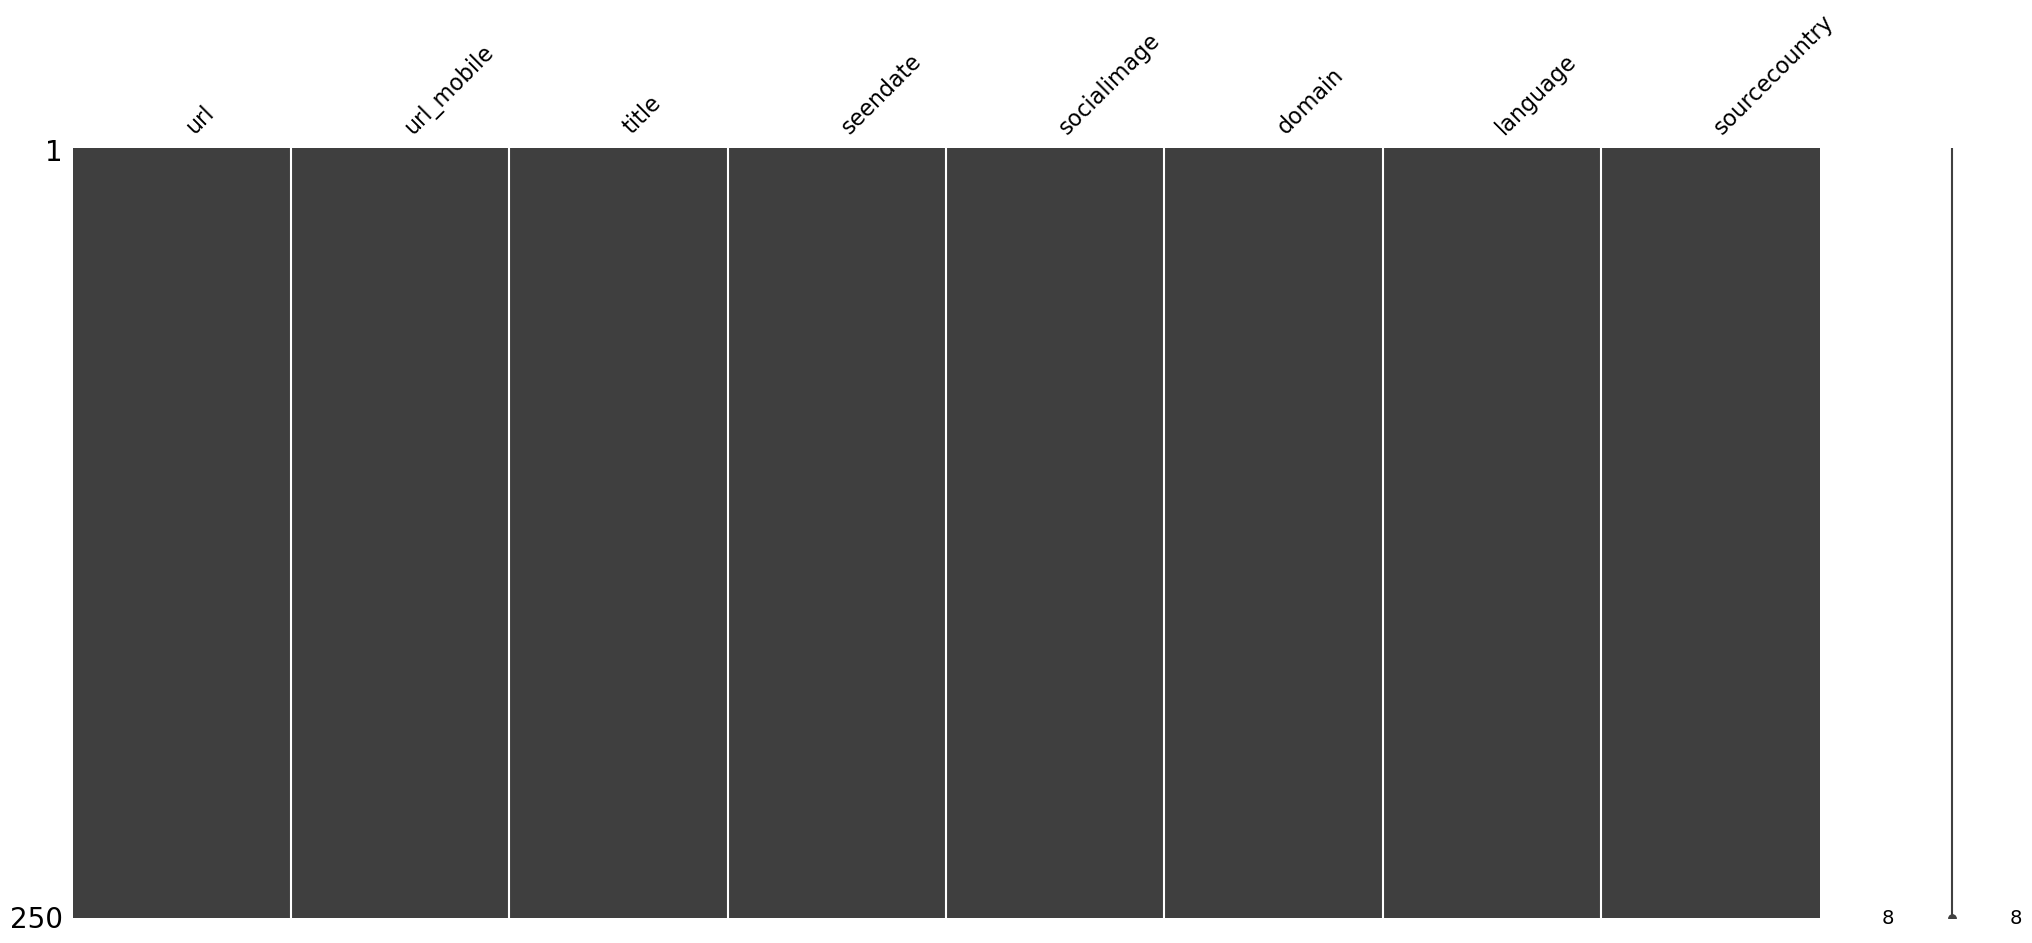

In [92]:
print(articles.shape)
msno.matrix(articles)
articles.head()

### Timeline Search

There are 5 available modes when making a timeline search:

- timelinevol - a timeline of the volume of news coverage matching the filters, represented as a percentage of the total news articles monitored by GDELT.
- timelinevolraw - similar to timelinevol, but has the actual number of articles and a total rather than a percentage
- timelinelang - similar to timelinevol but breaks the total articles down by published language. Each language is returned as a separate column in the DataFrame.
- timelinesourcecountry - similar to timelinevol but breaks the total articles down by the country they were published in. Each country is returned as a separate column in the DataFrame.
- timelinetone - a timeline of the average tone of the news coverage matching the filters. See GDELT's documentation for more information about the tone metric.

In [ ]:
# Get a timeline of the number of articles matching the filters
timeline = gd.timeline_search("timelinevol", f)

In [101]:
print(timeline.shape)
timeline.head()

(97, 2)


datetime  Volume Intensity
0 2020-05-10 00:00:00+00:00            0.1839
1 2020-05-10 00:15:00+00:00            0.4375
2 2020-05-10 00:30:00+00:00            0.1273
3 2020-05-10 00:45:00+00:00            0.6582
4 2020-05-10 01:00:00+00:00            0.5048

In [103]:
timeline = gd.timeline_search("timelinelang", f)
timeline.head()

datetime  Croatian Volume Intensity  \
0 2020-05-10 00:00:00+00:00                        0.0   
1 2020-05-10 00:15:00+00:00                        0.0   
2 2020-05-10 00:30:00+00:00                        0.0   
3 2020-05-10 00:45:00+00:00                        0.0   
4 2020-05-10 01:00:00+00:00                        0.0   

   Bengali Volume Intensity  Spanish Volume Intensity  Dutch Volume Intensity  \
0                       0.0                    0.3509                     0.0   
1                       0.0                    0.2959                     0.0   
2                       0.0                    0.0000                     0.0   
3                       0.0                    0.9174                     0.0   
4                       0.0                    0.6431                     0.0   

   Indonesian Volume Intensity  Estonian Volume Intensity  \
0                          0.0                        0.0   
1                          0.0                        0.0   
2                          0.0                        0.0   
3                          0.0                        0.0   
4                          0.0                        0.0   

   Bulgarian Volume Intensity  Italian Volume Intensity  \
0                         0.0                       0.0   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                       0.0   

   Turkish Volume Intensity  ...  Chinese Volume Intensity  \
0                    0.0000  ...                    0.0000   
1                    0.0000  ...                    0.6897   
2                    0.0000  ...                    0.0000   
3                    3.3333  ...                    0.5882   
4                    0.0000  ...                    0.8475   

   Greek Volume Intensity  Galician Volume Intensity  \
0                     0.0                          0   
1                     0.0                          0   
2                     0.0                          0   
3                     0.0                          0   
4                     0.0                          0   

   Romanian Volume Intensity  German Volume Intensity  \
0                        0.0                      0.0   
1                        0.0                      0.0   
2                        0.0                      0.0   
3                        0.0                      0.0   
4                        0.0                      2.0   

   Slovak Volume Intensity  Arabic Volume Intensity  Polish Volume Intensity  \
0                      0.0                   0.0000                      0.0   
1                      0.0                   0.0000                      0.0   
2                      0.0                   1.0417                      0.0   
3                      0.0                   1.0870                      0.0   
4                      0.0                   0.0000                      0.0   

   Hungarian Volume Intensity  Hindi Volume Intensity  
0                         0.0                     0.0  
1                         0.0                     0.0  
2                         0.0                     0.0  
3                         0.0                     0.0  
4                         0.0                     0.0  

[5 rows x 35 columns]

In [113]:
# Convert all columns (except the first) to numeric, forcing errors to NaN
numeric_data = timeline.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')

# Calculate the average for each numeric column
averages = numeric_data.mean().sort_values(ascending=False)

# Modify column names to retain only "COUNTRY"
averages.index = [col.split()[0] for col in averages.index]

# Print the sorted averages
print(averages)

German        0.956051
English       0.870432
Finnish       0.670226
Swedish       0.609242
Catalan       0.584773
Norwegian     0.543220
Galician      0.515464
Spanish       0.470172
Bengali       0.428694
Czech         0.422945
French        0.363269
Romanian      0.356343
Estonian      0.343642
Slovenian     0.343642
Icelandic     0.320733
Arabic        0.300356
Croatian      0.294551
Chinese       0.248740
Bulgarian     0.237577
Vietnamese    0.206186
Russian       0.193131
Greek         0.168856
Korean        0.167823
Portuguese    0.142238
Hungarian     0.135148
Hebrew        0.132771
Polish        0.132771
Dutch         0.116080
Turkish       0.111771
Italian       0.098524
Slovak        0.073638
Lithuanian    0.060643
Hindi         0.030322
Indonesian    0.024677
dtype: float64


In [117]:
timeline = gd.timeline_search("timelinesourcecountry", f)
timeline.head()

datetime  Qatar Volume Intensity  \
0 2020-05-10 00:00:00+00:00                       0   
1 2020-05-10 00:15:00+00:00                       0   
2 2020-05-10 00:30:00+00:00                       0   
3 2020-05-10 00:45:00+00:00                       0   
4 2020-05-10 01:00:00+00:00                       0   

   Czech Republic Volume Intensity  Hungary Volume Intensity  \
0                              0.0                       0.0   
1                              0.0                       0.0   
2                              0.0                       0.0   
3                              0.0                       0.0   
4                              0.0                       0.0   

   Moldova Volume Intensity  Bangladesh Volume Intensity  \
0                         0                          0.0   
1                         0                          0.0   
2                         0                          0.0   
3                         0                          0.0   
4                         0                          0.0   

   Brazil Volume Intensity  Argentina Volume Intensity  \
0                      0.0                         0.0   
1                      0.0                         0.0   
2                      0.0                         0.0   
3                      0.0                         0.0   
4                      0.0                         0.0   

   Switzerland Volume Intensity  Tunisia Volume Intensity  ...  \
0                           0.0                       0.0  ...   
1                           0.0                       0.0  ...   
2                           0.0                       0.0  ...   
3                           0.0                       0.0  ...   
4                           0.0                       0.0  ...   

   Peru Volume Intensity  Italy Volume Intensity  Denmark Volume Intensity  \
0                    0.0                     0.0                       0.0   
1                    0.0                     0.0                       0.0   
2                    0.0                     0.0                       0.0   
3                    0.0                     0.0                       0.0   
4                    0.0                     0.0                       0.0   

   Sweden Volume Intensity   Volume Intensity  Armenia Volume Intensity  \
0                      0.0                  0                         0   
1                      0.0                  0                         0   
2                      0.0                  0                         0   
3                      0.0                  0                         0   
4                      0.0                  0                         0   

   Ethiopia Volume Intensity  Iceland Volume Intensity  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        0.0                       0.0   
4                        0.0                       0.0   

   South Africa Volume Intensity  United Arab Emirates Volume Intensity  
0                          100.0                                    0.0  
1                            0.0                                    0.0  
2                            0.0                                    0.0  
3                            0.0                                    2.0  
4                            0.0                                    0.0  

[5 rows x 90 columns]

In [119]:
# Convert all columns (except the first) to numeric, forcing errors to NaN
numeric_data = timeline.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')

# Calculate the average for each numeric column
averages = numeric_data.mean().sort_values(ascending=False)

# Modify column names to retain only "COUNTRY"
averages.index = [col.split()[0] for col in averages.index]

# Print the sorted averages
print(averages)

Gabon       2.061856
Estonia     1.890034
Syria       1.867932
South       1.778760
Zimbabwe    1.591214
              ...   
Taiwan      0.039652
Kuwait      0.038182
Albania     0.035549
Cyprus      0.032216
Libya       0.022411
Length: 89, dtype: float64


In [121]:
pd.options.display.max_rows = None  # Set to None to display all rows
print(averages)

Gabon          2.061856
Estonia        1.890034
Syria          1.867932
South          1.778760
Zimbabwe       1.591214
Colombia       1.547005
Australia      1.219459
United         1.072198
United         1.067560
Qatar          1.030928
Madagascar     1.030928
Germany        1.000971
Ireland        0.965624
New            0.860591
Spain          0.849901
Canada         0.704915
Finland        0.698998
Bangladesh     0.663475
Nigeria        0.573916
Norway         0.528351
Austria        0.518844
Belarus        0.515464
Kazakhstan     0.515464
Moldova        0.515464
Ecuador        0.501145
Jordan         0.496169
Armenia        0.463918
Czech          0.435013
France         0.428105
Saudi          0.395803
Mexico         0.368452
Slovenia       0.343642
Belgium        0.343642
Fiji           0.343642
Tanzania       0.343642
Guinea         0.343642
Vietnam        0.343571
Pakistan       0.342156
Egypt          0.327626
Iceland        0.320733
Chile          0.320733
China          0

In [125]:
timeline = gd.timeline_search("timelinetone", f)
timeline.head()

datetime  Average Tone
0 2020-05-10 00:00:00+00:00       -3.2793
1 2020-05-10 00:15:00+00:00       -1.6852
2 2020-05-10 00:30:00+00:00        0.3103
3 2020-05-10 00:45:00+00:00       -0.8980
4 2020-05-10 01:00:00+00:00       -1.8854

### Filters

Filters for keyword, domain, domain_exact, country and theme can be passed either as a single string or as a list of strings. If a list is passed, the values in the list are wrappeed in a boolean OR.

You must pass either start_date and end_date, or timespan

    start_date - The start date for the filter in YYYY-MM-DD format. The API officially only supports the most recent 3 months of articles. Making a request for an earlier date range may still return data, but it's not guaranteed.
    end_date - The end date for the filter in YYYY-MM-DD format.
    timespan - A timespan to search for, relative to the time of the request. Must match one of the API's timespan formats - https://blog.gdeltproject.org/gdelt-doc-2-0-api-debuts/
    num_records - The number of records to return. Only used in article list mode and can be up to 250.
    keyword - Return articles containing the exact phrase keyword within the article text.
    domain - Return articles from the specified domain. Does not require an exact match so passing "cnn.com" will match articles from cnn.com, subdomain.cnn.com and notactuallycnn.com.
    domain_exact - Similar to domain, but requires an exact match.
    country - Return articles published in a country or list of countries, formatted as the FIPS 2 letter country code.
    theme - Return articles that cover one of GDELT's GKG Themes. A full list of themes can be found here
    near - Return articles containing words close to each other in the text. Use near() to construct. eg. near = near(5, "airline", "climate").
    repeat - Return articles containing a single word repeated at least a number of times. Use repeat() to construct. eg. repeat =repeat(3, "environment"), or multi_repeat() if you want to use multiple restrictions eg. repeat = multi_repeat([(2, "airline"), (3, "airport")], "AND")


In [ ]:
from gdeltdoc import Filters, near, repeat

In [ ]:
f = Filters(
    start_date = "2019-05-01",
    end_date = "2021-05-02",
    num_records = 250,
    keyword = "climate change",
    domain = ["bbc.co.uk", "nytimes.com"],
    country = ["UK", "US"],
    theme = "GENERAL_HEALTH",
    near = near(10, "airline", "carbon"),
    repeat = repeat(5, "planet")
)

In [168]:
f = Filters(
    start_date = "2021-05-01",
    end_date = "2021-05-02",
    num_records = 250,
    keyword = "climate change",
)

In [170]:
articles = gd.article_search(f)
print(articles.shape)

(250, 8)


url  \
0  https://jambi.tribunnews.com/2021/04/06/peruba...   
1  https://www.naturalnews.com/2021-03-03-climate...   
2  https://www.khaleejtimes.com/editorials-column...   
3  https://www.kemenkeu.go.id/publikasi/siaran-pe...   
4                     https://www.dostor.org/3419273   

                                          url_mobile  \
0  https://jambi.tribunnews.com/amp/2021/04/06/pe...   
1                                                      
2  https://amp.khaleejtimes.com/editorials-column...   
3                                                      
4                                                      

                                               title          seendate  \
0  Perubahan Iklim Juga Mempengaruhi Penderita Di...  20210406T150000Z   
1  No justification for linking climate change to...  20210303T193000Z   
2  Why climate change crises are bad for sovereig...  20210302T210000Z   
3  Kemenkeu Rilis Penandaan Anggaran dan Pendanaa...  20210330T134500Z   
4  السيسى يشارك فى حوار القادة حول التداعيات الطا...  20210406T163000Z   

                                         socialimage                domain  \
0  https://cdn-2.tstatic.net/jambi/foto/bank/imag...  jambi.tribunnews.com   
1  https://www.naturalnews.com/wp-content/uploads...       naturalnews.com   
2  https://images.khaleejtimes.com/storyimage/KT/...      khaleejtimes.com   
3                                                           kemenkeu.go.id   
4                                                               dostor.org   

     language         sourcecountry  
0  Indonesian             Indonesia  
1     English         United States  
2     English  United Arab Emirates  
3  Indonesian             Indonesia  
4      Arabic                 Egypt

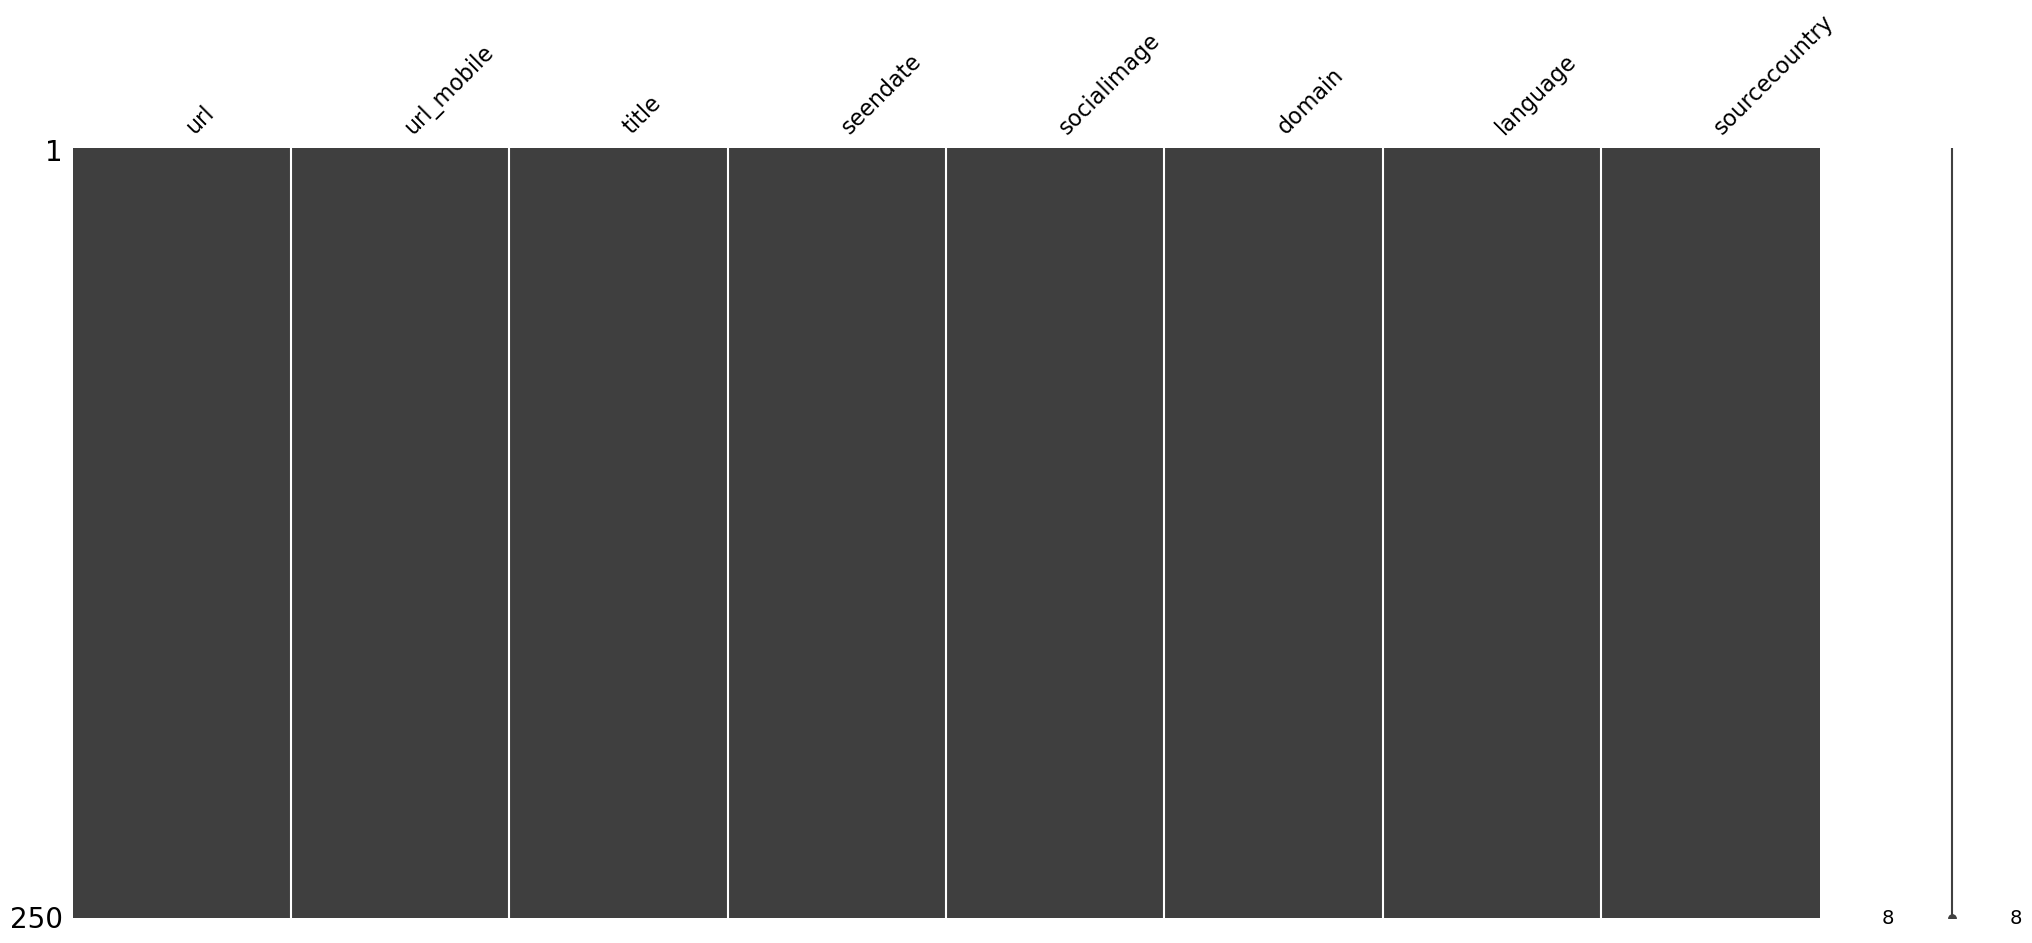

In [160]:
msno.matrix(articles)
articles.head()